# **ANÁLISE DE DADOS SOBRE FUTEBOL INTERNACIONAL**

Este projeto visa realizar uma análise abrangente dos dados de futebol internacional de um dataset encontrado no Kaggle (https://www.kaggle.com/datasets/patateriedata/all-international-football-results). 

Utilizando dois conjuntos de dados principais, 'all_matches.csv' e 'countries_names.csv', pretendemos explorar padrões temporais, avaliar o desempenho das seleções nacionais, investigar a influência de torneios específicos e criar visualizações para uma representação mais abrangente.

O projeto visa proporcionar uma compreensão aprofundada do panorama do futebol internacional, identificando padrões, tendências e fornecendo insights sobre o desempenho das seleções ao longo do tempo e em diferentes contextos de torneios. 

As visualizações geográficas adicionam uma dimensão espacial, oferecendo uma representação visual das relações entre países no cenário do futebol internacional.

<hr>

## **1.0 - Análise Exploratória de Dados**

## 1.1 - Carregando os conjuntos de dados para análise e explorando as primeiras linhas dos dados para entender sua estrutura

In [2]:
import pandas as pd

all_matches = pd.read_csv('./dataset/all_matches.csv')
countries_names = pd.read_csv('./dataset/countries_names.csv')

display(all_matches, countries_names)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False
...,...,...,...,...,...,...,...,...
48976,2024-01-15,Jordan,Malaysia,4,0,Asian Cup,Qatar,True
48977,2024-01-15,Cameroon,Guinea,1,1,African Nations Cup,Ivory Coast,True
48978,2024-01-15,Algeria,Angola,1,1,African Nations Cup,Ivory Coast,True
48979,2024-01-16,Thailand,Kyrgyzstan,2,0,Asian Cup,Qatar,True


,original_name,current_name
0,Afghanistan,Afghanistan
1,Albania,Albania
2,Algeria,Algeria
3,Andorra,Andorra
4,Angola,Angola
...,...,...
284,Northern Rhodesia,Zambia
285,Zanzibar,Zanzibar
286,Southern Rhodesia,Zimbabwe
287,Zimbabwe,Zimbabwe


## 1.2 - Verificação de valores ausentes e duplicados

In [3]:
# Verificando valores ausentes

print(all_matches.isnull().sum())
print(countries_names.isnull().sum())

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
neutral       0
dtype: int64
original_name    0
current_name     0
dtype: int64


In [4]:
# Verificando duplicatas

print(all_matches.duplicated().sum())
print(countries_names.duplicated().sum())

0
0


## 1.3 - Calculando estatísticas descritivas básicas de acordo com o placar dos jogos

In [5]:
# Análise generalista do dataset

print(all_matches.describe())

# Análise individual (coluna) do dataset

print('A MÉDIA de gols do time da casa é de {:.2f} gols'.format(all_matches['home_score'].mean()))
print('A MÉDIA de gols do time visitante é de {:.2f} gols'.format(all_matches['away_score'].mean()))
print('A MEDIANA de gols do time da casa é de {:.2f} gols'.format(all_matches['home_score'].median()))
print('A MEDIANA de gols do time visitante é de {:.2f} gols'.format(all_matches['away_score'].median()))
print('A MODA de gols do time da casa é de {:.2f} gols'.format(all_matches['home_score'].mode().tolist()[0])) # A função 'mode()' retorna uma Série, e pode haver mais de uma moda se houver empate
print('A MODA de gols do time visitante é de {:.2f} gols'.format(all_matches['away_score'].mode().tolist()[0])) # A função 'mode()' retorna uma Série, e pode haver mais de uma moda se houver empate
print('A VARIÂNCIA de gols do time da casa é de {:.2f} gols'.format(all_matches['home_score'].var()))
print('A VARIÂNCIA de gols do time visitante é de {:.2f} gols'.format(all_matches['away_score'].var()))
print('O DESVIO PADRÃO de gols do time da casa é de {:.2f} gols'.format(all_matches['home_score'].std()))
print('O DESVIO PADRÃO de gols do time visitante é de {:.2f} gols'.format(all_matches['away_score'].std()))
print('Os QUARTIS de gols do time da casa é de: 1ºQ {:.2f} gols, 2ºQ {:.2f} gols e 3ºQ {:.2f} gols'.format(all_matches['home_score'].quantile(0.25), all_matches['home_score'].quantile(0.5), all_matches['home_score'].quantile(0.75)))
print('Os QUARTIS de gols do time visitante é de: 1ºQ {:.2f} gols, 2ºQ {:.2f} gols e 3ºQ {:.2f} gols'.format(all_matches['away_score'].quantile(0.25), all_matches['away_score'].quantile(0.5), all_matches['away_score'].quantile(0.75)))

         home_score    away_score
count  48981.000000  48981.000000
mean       1.943631      0.989506
std        1.825131      1.203037
min        0.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        3.000000      1.000000
max       31.000000     15.000000
A MÉDIA de gols do time da casa é de 1.94 gols
A MÉDIA de gols do time visitante é de 0.99 gols
A MEDIANA de gols do time da casa é de 2.00 gols
A MEDIANA de gols do time visitante é de 1.00 gols
A MODA de gols do time da casa é de 1.00 gols
A MODA de gols do time visitante é de 0.00 gols
A VARIÂNCIA de gols do time da casa é de 3.33 gols
A VARIÂNCIA de gols do time visitante é de 1.45 gols
O DESVIO PADRÃO de gols do time da casa é de 1.83 gols
O DESVIO PADRÃO de gols do time visitante é de 1.20 gols
Os QUARTIS de gols do time da casa é de: 1ºQ 1.00 gols, 2ºQ 2.00 gols e 3ºQ 3.00 gols
Os QUARTIS de gols do time visitante é de: 1ºQ 0.00 gols, 2ºQ 1.00 gols e 3ºQ 1.00 gols


## 1.4 - Visualizando a distribuição dos gols dos jogos usando gráficos de barras, histogramas ou boxplots

In [15]:
import matplotlib.pyplot as plt

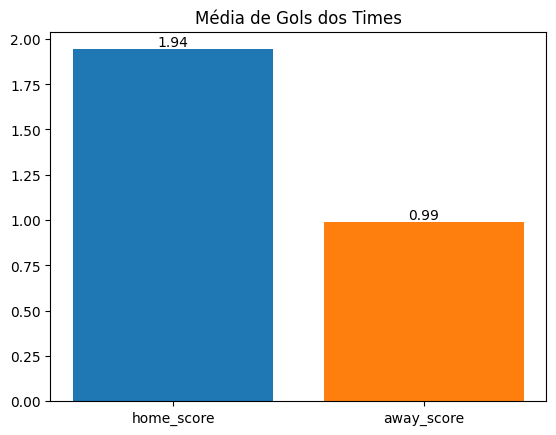

In [39]:
# Média de gols entre time da casa e time visitante

media_time_casa = all_matches['home_score'].mean()
media_time_visitante = all_matches['away_score'].mean()

plt.bar(all_matches.columns[3], media_time_casa)
plt.bar(all_matches.columns[4], media_time_visitante)
plt.text(all_matches.columns[3], media_time_casa, '{:.2f}'.format(media_time_casa), ha='center', va='bottom')
plt.text(all_matches.columns[4], media_time_visitante, '{:.2f}'.format(media_time_visitante), ha='center', va='bottom')
plt.title('Média de Gols dos Times')

plt.show()

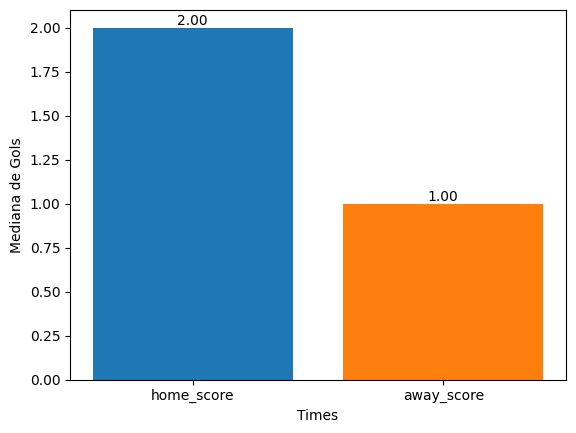

In [40]:
# Mediana de gols entre time da casa e time visitante

mediana_time_casa = all_matches['home_score'].median()
mediana_time_visitante = all_matches['away_score'].median()

plt.bar(all_matches.columns[3], mediana_time_casa)
plt.bar(all_matches.columns[4], mediana_time_visitante)
plt.text(all_matches.columns[3], mediana_time_casa, '{:.2f}'.format(mediana_time_casa), ha='center', va='bottom')
plt.text(all_matches.columns[4], mediana_time_visitante, '{:.2f}'.format(mediana_time_visitante), ha='center', va='bottom')
plt.xlabel('Times')
plt.ylabel('Mediana de Gols')

plt.show()

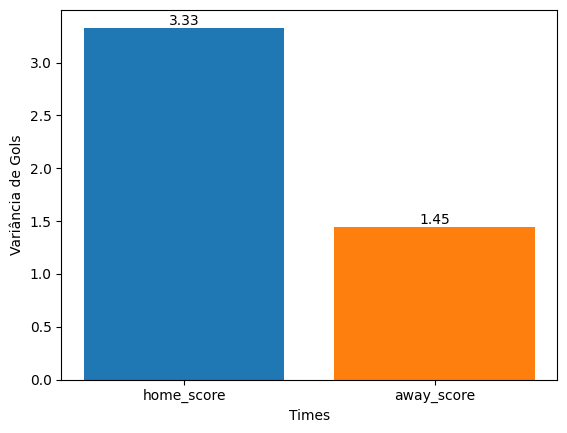

In [41]:
# Variância de gols entre time da casa e time visitante

variancia_time_casa = all_matches['home_score'].var()
variancia_time_visitante = all_matches['away_score'].var()

plt.bar(all_matches.columns[3], variancia_time_casa)
plt.bar(all_matches.columns[4], variancia_time_visitante)
plt.text(all_matches.columns[3], variancia_time_casa, '{:.2f}'.format(variancia_time_casa), ha='center', va='bottom')
plt.text(all_matches.columns[4], variancia_time_visitante, '{:.2f}'.format(variancia_time_visitante), ha='center', va='bottom')
plt.xlabel('Times')
plt.ylabel('Variância de Gols')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


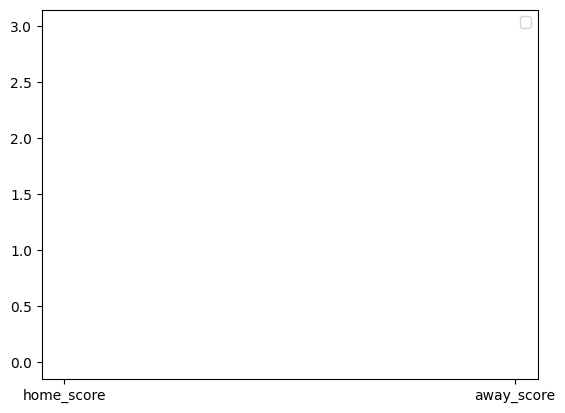

In [46]:
# Quartis de gols entre time de casa e time visitante

q1_time_casa = all_matches['home_score'].quantile(0.25)
q2_time_casa = all_matches['home_score'].quantile(0.5)
q3_time_casa = all_matches['home_score'].quantile(0.75)

q1_time_visitante = all_matches['away_score'].quantile(0.25)
q2_time_visitante = all_matches['away_score'].quantile(0.5)
q3_time_visitante = all_matches['away_score'].quantile(0.75)

plt.plot(all_matches.columns[3], q1_time_casa)
plt.plot(all_matches.columns[4], q1_time_visitante)
plt.plot(all_matches.columns[3], q2_time_casa)
plt.plot(all_matches.columns[4], q1_time_visitante)
plt.plot(all_matches.columns[3], q3_time_casa)
plt.plot(all_matches.columns[4], q3_time_visitante)
plt.legend()

plt.show()

